In [1]:
from astropy.table import Table, join, vstack, unique
import pdb
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord

import matplotlib
%matplotlib inline

/home/oxymoronic/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 
                            'mathtext.fontset': 'stix'})

In [3]:
clumpy = Table.read('../data/gzh_sdss_strictclumpy_trueclumpy_sdssdata.fits')

In [4]:
GSWLC = Table.read("../data/GSWLC-X1.dat", format='ascii.fast_no_header')
colnames = ['DR12_OBJID', 'GLXID', 'plate', 'MJD', 'fiber ID', 'RA', 'DEC', 'z', 'chi_sq', 
           'M*', 'M*_err', 'SFR', 'SFR_err', 'A_FUV', 'A_FUV_err', 'A_B', 'A_B_err', 'A_V',
           'A_V_err', 'flag_sed', 'UV_survey', 'SFR_wise', 'flag_wise', 'SFR_unwise',
           'flag_unwise', 'flag_mgs']

for i, name in enumerate(colnames):
    GSWLC.rename_column('col{}'.format(i+1), name)

In [5]:
gzh_sdss = Table.read('../data/gzh_sdss.fits')

objids = [int(objid) for objid in gzh_sdss['survey_id']]
gzh_sdss['OBJID'] = objids

In [6]:
imaging = np.unique(gzh_sdss['Table'])
gzh_sdss_coadd = gzh_sdss[gzh_sdss['Table'] == imaging[0]]
gzh_sdss_single = gzh_sdss[gzh_sdss['Table'] == imaging[1]]

print "Coadd: {}\t Shallow: {}".format(len(gzh_sdss_coadd), len(gzh_sdss_single))

Coadd: 30339	 Shallow: 21522


## Match  masses for all GZH SDSS galaxies (coadd depth)

In [7]:
catalog = SkyCoord(ra=GSWLC['RA']*u.deg, dec=GSWLC['DEC']*u.deg)
sample = SkyCoord(ra=gzh_sdss_coadd['RA']*u.deg, dec=gzh_sdss_coadd['DEC']*u.deg)
idx, d2d, d3d = sample.match_to_catalog_sky(catalog)

close_mask = (catalog[idx].separation(sample)<20*u.arcsec)
matches_in_gzh_coadd = gzh_sdss_coadd[close_mask]
matches_in_GSWLC_coadd = GSWLC[idx[close_mask]]

print len(matches_in_GSWLC_coadd), len(matches_in_gzh_coadd)

24336 24336


In [8]:
for col in matches_in_GSWLC_coadd.colnames:
    matches_in_gzh_coadd[col] = matches_in_GSWLC_coadd[col]

In [9]:
print len(matches_in_gzh_coadd), len(set(matches_in_gzh_coadd['DR12_OBJID']))

24336 23951


## Match masses for all GZH SDSS galaxies (single depth)

In [10]:
catalog = SkyCoord(ra=GSWLC['RA']*u.deg, dec=GSWLC['DEC']*u.deg)
sample = SkyCoord(ra=gzh_sdss_single['RA']*u.deg, dec=gzh_sdss_single['DEC']*u.deg)
idx, d2d, d3d = sample.match_to_catalog_sky(catalog)

close_mask = (catalog[idx].separation(sample)<20*u.arcsec)
matches_in_gzh_single = gzh_sdss_single[close_mask]
matches_in_GSWLC_single = GSWLC[idx[close_mask]]

print len(matches_in_GSWLC_single), len(matches_in_gzh_single)

20362 20362


In [11]:
for col in matches_in_GSWLC_single.colnames:
    matches_in_gzh_single[col] = matches_in_GSWLC_single[col]

In [12]:
len(set(matches_in_gzh_single['DR12_OBJID']))

20285

In [13]:
stacked = vstack([matches_in_gzh_coadd, matches_in_gzh_single])

In [14]:
unique_by_name = unique(stacked, keys='DR12_OBJID')
print len(unique_by_name)

unique_ids = np.unique(stacked['DR12_OBJID'])
print len(unique_ids)
unique_by_name

24065
24065


zooniverse_id,survey_id,Table,RA,DEC,imaging,total_count,total_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_flag,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_flag,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_flag,t01_smooth_or_features_total_count,t01_smooth_or_features_total_weight,t02_edgeon_a01_yes_fraction,t02_edgeon_a01_yes_weighted_fraction,t02_edgeon_a02_no_fraction,t02_edgeon_a02_no_weighted_fraction,t02_edgeon_total_count,t02_edgeon_total_weight,t03_bar_a01_bar_fraction,t03_bar_a01_bar_weighted_fraction,t03_bar_a02_no_bar_fraction,t03_bar_a02_no_bar_weighted_fraction,t03_bar_total_count,t03_bar_total_weight,t04_spiral_a01_spiral_fraction,t04_spiral_a01_spiral_weighted_fraction,t04_spiral_a02_no_spiral_fraction,t04_spiral_a02_no_spiral_weighted_fraction,t04_spiral_total_count,t04_spiral_total_weight,t05_bulge_prominence_a01_no_bulge_fraction,t05_bulge_prominence_a01_no_bulge_weighted_fraction,t05_bulge_prominence_a02_just_noticeable_fraction,t05_bulge_prominence_a02_just_noticeable_weighted_fraction,t05_bulge_prominence_a03_obvious_fraction,t05_bulge_prominence_a03_obvious_weighted_fraction,t05_bulge_prominence_a04_dominant_fraction,t05_bulge_prominence_a04_dominant_weighted_fraction,t05_bulge_prominence_total_count,t05_bulge_prominence_total_weight,t06_odd_a01_yes_fraction,t06_odd_a01_yes_weighted_fraction,t06_odd_a02_no_fraction,t06_odd_a02_no_weighted_fraction,t06_odd_total_count,t06_odd_total_weight,t07_rounded_a01_completely_round_fraction,t07_rounded_a01_completely_round_weighted_fraction,t07_rounded_a02_in_between_fraction,t07_rounded_a02_in_between_weighted_fraction,t07_rounded_a03_cigar_shaped_fraction,t07_rounded_a03_cigar_shaped_weighted_fraction,t07_rounded_total_count,t07_rounded_total_weight,t08_odd_feature_a01_ring_fraction,t08_odd_feature_a01_ring_weighted_fraction,t08_odd_feature_a02_lens_or_arc_fraction,t08_odd_feature_a02_lens_or_arc_weighted_fraction,t08_odd_feature_a03_disturbed_fraction,t08_odd_feature_a03_disturbed_weighted_fraction,t08_odd_feature_a04_irregular_fraction,t08_odd_feature_a04_irregular_weighted_fraction,t08_odd_feature_a05_other_fraction,t08_odd_feature_a05_other_weighted_fraction,t08_odd_feature_a06_merger_fraction,t08_odd_feature_a06_merger_weighted_fraction,t08_odd_feature_a07_dust_lane_fraction,t08_odd_feature_a07_dust_lane_weighted_fraction,t08_odd_feature_total_count,t08_odd_feature_total_weight,t09_bulge_shape_a01_rounded_fraction,t09_bulge_shape_a01_rounded_weighted_fraction,t09_bulge_shape_a02_boxy_fraction,t09_bulge_shape_a02_boxy_weighted_fraction,t09_bulge_shape_a03_no_bulge_fraction,t09_bulge_shape_a03_no_bulge_weighted_fraction,t09_bulge_shape_total_count,t09_bulge_shape_total_weight,t10_arms_winding_a01_tight_fraction,t10_arms_winding_a01_tight_weighted_fraction,t10_arms_winding_a02_medium_fraction,t10_arms_winding_a02_medium_weighted_fraction,t10_arms_winding_a03_loose_fraction,t10_arms_winding_a03_loose_weighted_fraction,t10_arms_winding_total_count,t10_arms_winding_total_weight,t11_arms_number_a01_1_fraction,t11_arms_number_a01_1_weighted_fraction,t11_arms_number_a02_2_fraction,t11_arms_number_a02_2_weighted_fraction,t11_arms_number_a03_3_fraction,t11_arms_number_a03_3_weighted_fraction,t11_arms_number_a04_4_fraction,t11_arms_number_a04_4_weighted_fraction,t11_arms_number_a05_more_than_4_fraction,t11_arms_number_a05_more_than_4_weighted_fraction,t11_arms_number_a06_cant_tell_fraction,t11_arms_number_a06_cant_tell_weighted_fraction,t11_arms_number_total_count,t11_arms_number_total_weight,t12_clumpy_a01_yes_fraction,t12_clumpy_a01_yes_weighted_fraction,t12_clumpy_a02_no_fraction,t12_clumpy_a02_no_weighted_fraction,t12_clumpy_total_count,t12_clumpy_total

In [15]:
mass_range = (unique_by_name['M*']>=9.) & (unique_by_name['M*']<=10.) & (unique_by_name['z']<=0.04)

print "Number of STRIPE 82 galaxies with 9 < M* < 10 in the GSWLC:",len(unique_by_name[mass_range])

Number of STRIPE 82 galaxies with 9 < M* < 10 in the GSWLC: 923


# Focus.
### What do we need? 
1. total fraction of clumpy galaxies in the mass range 9 - 10
2. estimated additional number of clumpy galaxies we'll uncover in the rest of the sdss sample

To do the first we need 
1. the total number of unique galaxies that have masses in the GSWLC 
    I have 24K unique galaxies with masses. 
2. the number of those which are clumpy

I think I did the second one already in another notebook

In [16]:
clumpy_masses = []
clumpy_dr12ids = []

for objid in clumpy['survey_id']:
    obj = unique_by_name['survey_id'] == objid
    
    if np.sum(obj)>0:
        #print unique_by_name[obj]['DR12_OBJID'][0]
        #pdb.set_trace()
        clumpy_masses.append(unique_by_name[obj]['M*'][0])
        clumpy_dr12ids.append(unique_by_name[obj]['DR12_OBJID'][0])

    else:
        clumpy_masses.append(0.)
        clumpy_dr12ids.append('none')
        
        
clumpy_masses = np.array(clumpy_masses)

In [17]:
clumpy['M*'] = clumpy_masses
clumpy['DR12_OBJID'] = clumpy_dr12ids

In [18]:
clumpy_unique = unique(clumpy, keys='DR12_OBJID')
len(clumpy_unique)

74

In [19]:
clumpy_mass_range = (clumpy['M*']>=9.) & (clumpy['M*']<=10.) & (clumpy['REDSHIFT']<=0.06)

print "Number of STRIPE 82 CLUMPY galaxies with 9 < M* < 10 in the GSWLC:",len(clumpy[clumpy_mass_range])

Number of STRIPE 82 CLUMPY galaxies with 9 < M* < 10 in the GSWLC: 15


/home/oxymoronic/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


In [20]:
clumpy2 = Table.read('../data/clumpy_coadd_final75_gzh_dr12ancillary.fits')

In [21]:
ids = []
for objid in clumpy2['OBJID']:
    obj = clumpy['survey_id'] == str(objid)
    
    if np.sum(obj)>0:
        ids.append(clumpy['survey_id'][obj][0])

    else:
        print 'Not found'

In [22]:
frac = (20./923)*100

In [23]:
frac

2.1668472372697725

## Digitized Guo14 Figure 11: Clumpy Fraction vs Redshift

In [40]:
matplotlib.rcParams.update({'font.size': 30, 'font.family': 'STIXGeneral', 
                            'mathtext.fontset': 'stix'})
from matplotlib.legend_handler import HandlerLine2D


In [25]:
guo_low_mass = Table.read('../data/mass1.csv',format='ascii')
guo_mid_mass = Table.read('../data/mass2.csv', format='ascii')
guo_high_mass = Table.read('../data/mass3.csv', format='ascii')
other_clumps = Table.read('../data/other_clump_fractions.csv', format='ascii')

guo_VDI = Table.read('../data/VDI.csv', format='ascii')
guo_minor_merger_25Gyr = Table.read('../data/minor_merger_2_5_gyr.csv', format='ascii')
guo_minor_merger_2Gyr = Table.read('../data/minor_merger_2_gyr.csv', format='ascii')

In [26]:
guo_low_mass

col1,col2
float64,float64
0.699513381995,63.0656934307
1.20559610706,61.3138686131
1.70194647202,64.3795620438
2.20316301703,61.6058394161
2.70437956204,60.4379562044


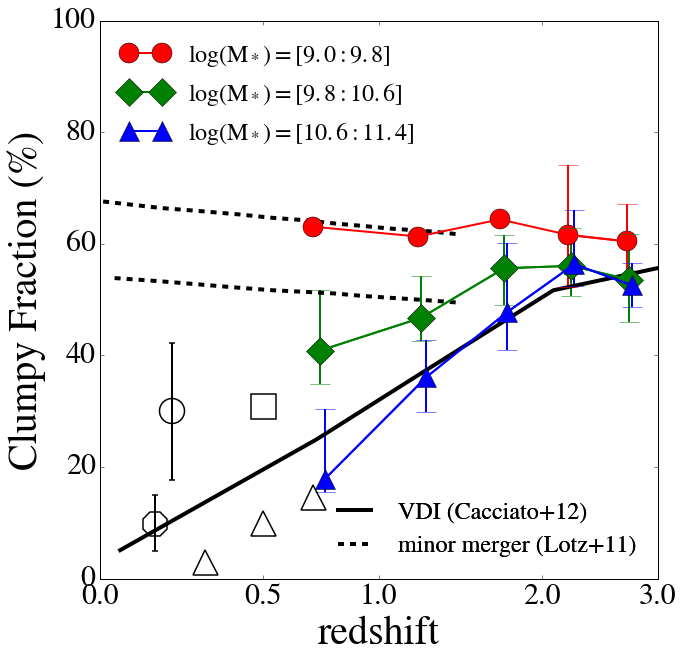

In [41]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


vdi, = ax.plot(np.log10(1+ np.array(guo_VDI['col1'])), guo_VDI['col2'], 
               color='k', label='VDI (Cacciato+12)', lw=4)
minor, = ax.plot(np.log10(1+ np.array(guo_minor_merger_25Gyr['col1'])), guo_minor_merger_25Gyr['col2'], 
                 color='k', ls='--', label='minor merger (Lotz+11)', lw=4)
ax.plot(np.log10(1+ np.array(guo_minor_merger_2Gyr['col1'])), guo_minor_merger_2Gyr['col2'], color='k', ls='--', lw=4)


# GUO's clumpy fractions
# -------------------------------------------------------------------------------
low, = ax.plot(np.log10(1+ np.array(guo_low_mass['col1']) ), guo_low_mass['col2'], 
               marker='o', color='r', markersize=20, 
               label=r'log(M$_*) = [9.0: 9.8]$')

lower_error = guo_low_mass['col2'][3:] - np.array([52.262, 53.86])
upper_error = np.array([74.1605,  67.153]) - guo_low_mass['col2'][3:] 

low_err = ax.errorbar( np.log10(1+ np.array(guo_low_mass['col1'])[3:]), guo_low_mass['col2'][3:], 
                      yerr=[lower_error, upper_error], color='r', capsize=10, lw=2)



mid, = ax.plot(np.log10(1+ np.array(guo_mid_mass['col1'])), guo_mid_mass['col2'], 
               marker='D', color='g', markersize=20, label=r'log(M$_*) = [9.8:10.6]$')

lower_error = guo_mid_mass['col2'] - np.array([34.890, 42.62, 49.0510, 50.656, 45.985])
upper_error = np.array([51.67, 54.16, 61.605, 62.773, 61.751]) - guo_mid_mass['col2']

mid_err = ax.errorbar( np.log10(1+ np.array(guo_mid_mass['col1'])), guo_mid_mass['col2'], 
                      yerr=[lower_error, upper_error], color='g', capsize=10, lw=2)



high, = ax.plot(np.log10(1+ np.array(guo_high_mass['col1'])), guo_high_mass['col2'], 
                marker='^', color='b', markersize=20,
               label=r'log(M$_*) = [10.6:11.4]$')

lower_error = guo_high_mass['col2'] - np.array([15.474, 29.927, 41.0218,52.408,48.61])
upper_error = np.array([30.36,42.773,60.145,65.98,56.49]) - guo_high_mass['col2'] 

high_err = ax.errorbar( np.log10(1+ np.array(guo_high_mass['col1'])), guo_high_mass['col2'], 
                      yerr=[lower_error, upper_error], color='b', capsize=10, lw=2)



# OTHER PEOPLE'S clumpy fractions
# -------------------------------------------------------------------------------
other_clumps_z = np.log10(1+ np.array(other_clumps['col1']))
other_clumps_frac = np.array(0.0 + other_clumps['col2'])



lower_error = np.array([other_clumps_frac[0] - 17.72])
upper_error = 42.23 - np.array([other_clumps_frac[0]])

O09 = ax.errorbar(other_clumps_z[0], other_clumps_frac[0], yerr=[lower_error, upper_error], 
                  marker='o', markersize=25, color='k',
                  markeredgecolor='k', markeredgewidth=1.5, fillstyle='none')


lower_error = np.array([other_clumps_frac[1] - 5.0356])
upper_error = 15.0118 - np.array([other_clumps_frac[1]])

G15 = ax.errorbar(other_clumps_z[1], other_clumps_frac[1],  yerr=[lower_error, upper_error],
                  marker='8', markersize=25, color='k',
                  markeredgecolor='k', markeredgewidth=1.5, fillstyle='none')

M14 = ax.plot(other_clumps_z[2:], other_clumps_frac[2:], marker='^', markersize=25,
             markeredgecolor='k', markeredgewidth=1.5, fillstyle='none', ls='None')

E07 = ax.plot(np.log10(1+0.5), 31, marker='s', markersize=25,
             markeredgecolor='k', markeredgewidth=1.5, fillstyle='none', ls='None')

#ax.plot(np.log10(1+0.05), frac, marker='*', color='r', markersize=20)


orig_z = np.array([0., 0.5, 1., 2., 3.])
log_z = np.log10(1+orig_z)

ax.set_xlim(np.log10(1+0.0), np.log10(1+3.0))
ax.set_xticks(log_z)
ax.set_xticklabels(orig_z)

ax.set_ylim(0, 100)


ax.set_xlabel('redshift', fontsize=40)
ax.set_ylabel('Clumpy Fraction (%)',fontsize=40)

mass_legend = plt.legend(handles=[low, mid, high], loc='upper left', frameon=False, fontsize=24)
                         #handler_map={type(low): HandlerLine2D(numpoints=1)})

line_legend = plt.legend(handles=[vdi, minor], loc='lower right', frameon=False, fontsize=24)

ax = plt.gca().add_artist(mass_legend)
ax = plt.gca().add_artist(line_legend)



plt.savefig('clumpy_fraction_vs_redshift.png')

[ 0.          0.04139269  0.07918125  0.11394335  0.14612804  0.17609126
  0.20411998  0.23044892  0.25527251  0.2787536   0.30103     0.32221929
  0.34242268  0.36172784  0.38021124  0.39794001  0.41497335  0.43136376
  0.44715803  0.462398    0.47712125  0.49136169  0.50514998  0.51851394
  0.53147892  0.54406804  0.5563025   0.56820172  0.5797836   0.59106461]
[       -inf -1.         -0.69897    -0.52287875 -0.39794001 -0.30103
 -0.22184875 -0.15490196 -0.09691001 -0.04575749  0.          0.04139269
  0.07918125  0.11394335  0.14612804  0.17609126  0.20411998  0.23044892
  0.25527251  0.2787536   0.30103     0.32221929  0.34242268  0.36172784
  0.38021124  0.39794001  0.41497335  0.43136376  0.44715803  0.462398  ]
0.0487901641694


/home/oxymoronic/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/home/oxymoronic/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


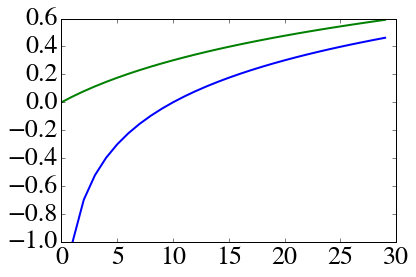

In [28]:
z = np.arange(0,3, .1)

print np.log10(1+z)
print np.log10(z)

plt.plot(np.log10(z))
plt.plot(np.log10(1+z))

print np.log(1+0.05)